# Работа с обучающей выборкой. В качестве выборки используются данные с сайта ati.su с 14.03 по 10.04 включительно.

Немного информации про датасет.</br>
Датасет содержит данные о грузоперевозках, выгруженных с сайта ati.su. Необходимо почистить данные от лишней информации и позже обучить модель, которая будет классифицировать данные по нужным категориям.</br>
Колонки датасета содержат следующую информацию:</br>
• Number_of_cargo - информация о номере груза в системе АТИ</br>
• Distance - расстояние между точками погрузки и выгрузки</br>
• Transport - вид транспорта, необходимый для погрузки</br>
• Cargo - сам груз и его габариты</br>
• Start - точка погрузки</br>
• End - точка выгрузки</br>
• Price - стоимость перевозки</br>
• Contacts - контакты с заказчиком</br>

In [156]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import ast

In [158]:
df = pd.read_excel('test_data_22_04.xlsx')

In [159]:
df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...


In [160]:
df.dtypes

Number_of_cargo    object
Distance           object
Transport          object
Cargo              object
Start              object
End                object
Price              object
Contacts           object
Link               object
dtype: object

In [164]:
df.shape

(3149, 9)

### 1. Удалим данные, доступные только по подписке и повторяющиеся грузы

In [167]:
df['Contacts'].value_counts().iloc[0]


1371

In [169]:
sub = df['Contacts'].value_counts().idxmax()
sub

'Показать контакты и ставкуДоступно после покупки\xa0лицензии «Грузы по России»'

##### Обозначим new_df датафрейм без данных, которые доступны только по подписке

In [175]:
new_df = df[df['Contacts'] != sub]
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...


##### Удалим повторяющиеся грузы и обновим индексацию

In [178]:
new_df = new_df.drop_duplicates(subset='Number_of_cargo', ignore_index=True)
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...


In [180]:
new_df['Number_of_cargo'].value_counts(dropna=False)

Number_of_cargo
#TUZ48361Номер груза в системе АТИ     1
#KRU116332Номер груза в системе АТИ    1
#JMF39141Номер груза в системе АТИ     1
#LEY24027Номер груза в системе АТИ     1
#FYK152694Номер груза в системе АТИ    1
                                      ..
#WWD164882Номер груза в системе АТИ    1
#SVS31331Номер груза в системе АТИ     1
#KIY39926Номер груза в системе АТИ     1
#JEL159333Номер груза в системе АТИ    1
#VBK26464Номер груза в системе АТИ     1
Name: count, Length: 688, dtype: int64

In [182]:
new_df.shape

(688, 9)

### Обработаем полученные данные

##### Посмотрим на то, где у нас есть пропущенные значения

<Axes: >

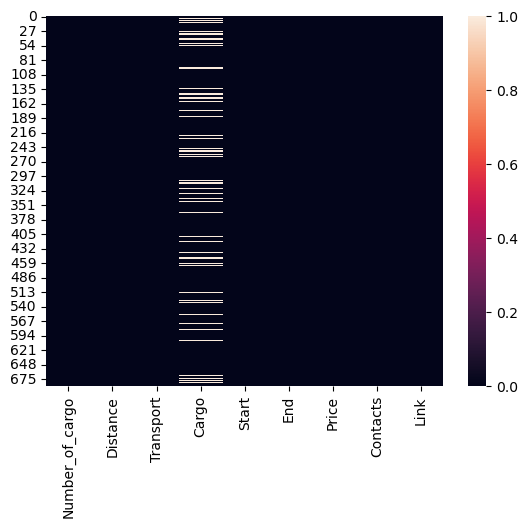

In [186]:
sns.heatmap(new_df[new_df.columns].isnull())

### 2. Глядя на тепловую карту, можно понять, что пропуски присутствуют только в одном столбце, где указывается информацию про то, какой груз мы везем. Заменим пропуски значением ,,Информация о грузе не найдена".

In [189]:
new_df['Cargo'] = new_df['Cargo'].fillna('Информация о грузе не найдена')
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...


##### Удалим лишнее в первом столбце

In [192]:
new_df = new_df.assign(number_of_cargo = new_df['Number_of_cargo'].apply(lambda x: re.sub(r'Ном.*$', '', x)))
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link,number_of_cargo
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359


##### Удалим лишнее в distance

In [195]:
new_df = new_df.assign(distance_km=new_df['Distance'].apply(lambda x: int(''.join(x.split(' '))[:-2])))
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link,number_of_cargo,distance_km
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458


##### Чистка конца столбца прайс

In [198]:
def del1(string): # функция удаляет все, что в строке идет после букв Отп
    newst = ''
    for i in range(len(string)-2):
        if string[i:i+3] == 'Отп':
            return string[:i]
    return string

def del2(string): # еще одна функция для отчистки рекламного мусора в конце строки
    new_string = ''
    for i in range(len(string)-3):
        if string[i:i+4] == 'торг':
            return string[:i+4]
    return string

# new_df = new_df.assign(price_del_end = new_df['Price'].apply(lambda x: re.sub(r'Отп.*$', '', x)))
new_df = new_df.assign(price_del_end = new_df['Price'].apply(lambda x: del2(del1(x))))
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9..."
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,"запрос ставкибезнал с НДС, без НДС"
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8..."


In [200]:
new_df['price_del_end'].value_counts()[0:3]

price_del_end
запрос ставкибезнал с НДС, без НДС                               53
90 000 рубс НДС109,6руб/км75 000 руббез НДС91,4руб/кмбез торг    42
запрос ставкибезнал с НДС                                        15
Name: count, dtype: int64

#### В столбце с информацией о цене содержится достаточно много строк без цены с запросом ставки. Объединим все эти строки в одну категорию

In [203]:
new_df.loc[new_df['price_del_end'].str.startswith('запрос'), 'price_del_end'] = 'запрос ставки'
new_df.loc[new_df['price_del_end'].str.startswith('груза нет'), 'price_del_end'] = 'запрос ставки'

In [205]:
new_df['price_del_end'].value_counts()[0:3]

price_del_end
запрос ставки                                                                   126
90 000 рубс НДС109,6руб/км75 000 руббез НДС91,4руб/кмбез торг                    42
95 000 рубс НДС115,7руб/км90 000 руббез НДС109,6руб/кмпредопл. 50% топл.торг     13
Name: count, dtype: int64

 #### 3. Добавим столбец, содержащий список цен со следующей структурой:
 #### руб с НДС / руб.км с НДС / руб без НДС / руб.км без НДС

In [208]:
def find_num(string):
    if string == 'запрос ставки':
        return string
    new_string = ''
    a = []
    for i in range(len(string)):
        if string[i].isdigit():
            new_string += string[i]
        elif string[i] == ',':
            new_string += '.'
        elif string[i] == 'р':
            a.append((new_string))
            new_string = ''
        elif string[i] == 'т':
            a.append((new_string))
            new_string = ''
        elif string[i] == 'ч':
            break
        else: None
            
    b = [(x) for x in a if len(x) != 0]

    return b

new_df = new_df.assign(price = new_df['price_del_end'].apply(find_num))
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end,price
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...","[40500, 98.1, 33000, 79.9, 50]"
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,запрос ставки,запрос ставки
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","[45000, 98.3, 37000, 80.8]"


#### В столбцах Start и End содержаться массивы, которые записаны в виде строк. Напишем функцию, которая это исправит.

In [211]:
def str_to_list(array_str):
    return ast.literal_eval(array_str)

new_df['cities'] = new_df['Start'].apply(str_to_list)
new_df['date'] = new_df['End'].apply(str_to_list)
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end,price,cities,date
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...","[40500, 98.1, 33000, 79.9, 50]","[Красноярск, Абакан]","[Красноярск, готов 11-12 апр., Абакан, 40 500 ..."
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,запрос ставки,запрос ставки,"[Красноярск, Черногорск]","[Красноярск, готов 11 апр., Черногорск]"
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","[45000, 98.3, 37000, 80.8]","[Сосновоборск, Абакан]","[Сосновоборск, готов 11-14 апр., Абакан, 45 00..."


##### В столбце Start содержится информация о месте погрузки и выгрузки, но некоторые грузы являются сборными (содержат несколько точек погрузки/выгрузки). Хотелось бы как-то отслеживать информацию о том, является ли груз сборным, поэтому создадим бинарную переменную, которая будет отвечать за это.

In [214]:
def loading(data):
    if len(data) > 2:
        return 1
    else: return 0
    
new_df['loading'] = new_df['cities'].apply(loading)
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end,price,cities,date,loading
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...","[40500, 98.1, 33000, 79.9, 50]","[Красноярск, Абакан]","[Красноярск, готов 11-12 апр., Абакан, 40 500 ...",0
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,запрос ставки,запрос ставки,"[Красноярск, Черногорск]","[Красноярск, готов 11 апр., Черногорск]",0
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","[45000, 98.3, 37000, 80.8]","[Сосновоборск, Абакан]","[Сосновоборск, готов 11-14 апр., Абакан, 45 00...",0


##### Теперь распарсим данные из колонки cities на место погрузки (start) и место выгрузки (end)

In [217]:
def start_end(data):
    values = [None] * 2
    values[0] = data[0]
    values[1] = data[1:]
    return pd.Series(values)

start_stop_df = new_df['cities'].apply(start_end).rename(columns = {0: 'start', 1: 'end'})

new_df = pd.concat([new_df, start_stop_df], axis=1)

new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end,price,cities,date,loading,start,end
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...","[40500, 98.1, 33000, 79.9, 50]","[Красноярск, Абакан]","[Красноярск, готов 11-12 апр., Абакан, 40 500 ...",0,Красноярск,[Абакан]
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,запрос ставки,запрос ставки,"[Красноярск, Черногорск]","[Красноярск, готов 11 апр., Черногорск]",0,Красноярск,[Черногорск]
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","[45000, 98.3, 37000, 80.8]","[Сосновоборск, Абакан]","[Сосновоборск, готов 11-14 апр., Абакан, 45 00...",0,Сосновоборск,[Абакан]


##### Также распарсим из колонки date информацию о том, когда будет осуществляться погрузка

In [220]:
def get_date(data):
    for item in data:
        if item.strip()[0:5] == 'готов':
            return item
        elif item.strip() == 'постоянно':
            return item
    return 'Не удалось получить информацию'
        
new_df['date_load'] = new_df['date'].apply(get_date)
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Start,End,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end,price,cities,date,loading,start,end,date_load
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"['Красноярск', 'Абакан']","['Красноярск', 'готов 11-12 апр.', 'Абакан', '...","40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...","[40500, 98.1, 33000, 79.9, 50]","[Красноярск, Абакан]","[Красноярск, готов 11-12 апр., Абакан, 40 500 ...",0,Красноярск,[Абакан],готов 11-12 апр.
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","['Красноярск', 'Черногорск']","['Красноярск', 'готов 11 апр.', 'Черногорск']","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,запрос ставки,запрос ставки,"[Красноярск, Черногорск]","[Красноярск, готов 11 апр., Черногорск]",0,Красноярск,[Черногорск],готов 11 апр.
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"['Сосновоборск', 'Абакан']","['Сосновоборск', 'готов 11-14 апр.', 'Абакан',...","45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","[45000, 98.3, 37000, 80.8]","[Сосновоборск, Абакан]","[Сосновоборск, готов 11-14 апр., Абакан, 45 00...",0,Сосновоборск,[Абакан],готов 11-14 апр.


##### Удалим лишние столбцы

In [223]:
new_df = new_df.drop(['Start', 'End', 'date', 'cities'], axis=1)
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end,price,loading,start,end,date_load
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...","[40500, 98.1, 33000, 79.9, 50]",0,Красноярск,[Абакан],готов 11-12 апр.
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,запрос ставки,запрос ставки,0,Красноярск,[Черногорск],готов 11 апр.
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","[45000, 98.3, 37000, 80.8]",0,Сосновоборск,[Абакан],готов 11-14 апр.


#### 4. Разделим столбец с информацией о цене на 5 столбцов. Первые 4 будут содержать информацию о цене, последний столбец будет бинарным признаком, показывающий известна ли информация о цене или же ставка скрыта.

In [226]:
def split_data(data):
    request = isinstance(data, str)
    values = [None] * 5
    if not request:
        for i, val in enumerate(data):
            if i < 4:
                values[i] = val

    values[4] = int(request)

    return pd.Series(values)


price_df = new_df['price'].apply(split_data).rename(columns={0: 'nds', 1: 'nds_km', 2: 'without_nds', 3: 'without_nds_km', 4: 'request_price'})

new_df = pd.concat([new_df, price_df], axis=1)


In [228]:
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end,price,loading,start,end,date_load,nds,nds_km,without_nds,without_nds_km,request_price
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...","[40500, 98.1, 33000, 79.9, 50]",0,Красноярск,[Абакан],готов 11-12 апр.,40500,98.1,33000,79.9,0.0
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,запрос ставки,запрос ставки,0,Красноярск,[Черногорск],готов 11 апр.,NaN,NaN,NaN,NaN,1.0
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","[45000, 98.3, 37000, 80.8]",0,Сосновоборск,[Абакан],готов 11-14 апр.,45000,98.3,37000,80.8,0.0


##### Количество значений NaN равно количеству строк с запросом ставки, значит разделение прошло успешно

In [231]:
new_df['nds'].value_counts(dropna=False)[0:3], new_df[new_df['price']=='запрос ставки'].shape[0]

(nds
 NaN       126
 90000     104
 100000     53
 Name: count, dtype: int64,
 126)

#### Обработаем контактную информацию

In [234]:
new_df['Contacts'] = new_df['Contacts'].fillna('Информация не найдена')

In [236]:
def del_cont(string):
    new_string = []
    for i in range(len(string)-3):
        if string[i:i+4] == 'Код:':
            new_string.append(string[:i])
        if string[i] == '+' and string[i+1].isdigit() == True:
            j = i
            number = ''
            for j in range(j,len(string)):
                if string[j] != ',':
                    number += string[j]
                else:
                    new_string.append(number)
                    number = ''
                    break

    return new_string


new_df = new_df.assign(inform = new_df['Contacts'].apply(del_cont))
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end,...,loading,start,end,date_load,nds,nds_km,without_nds,without_nds_km,request_price,inform
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",...,0,Красноярск,[Абакан],готов 11-12 апр.,40500,98.1,33000,79.9,0.0,[Оплата по оригиналам ТН+бух.док. 3-5 б.д.100...
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,запрос ставки,...,0,Красноярск,[Черногорск],готов 11 апр.,NaN,NaN,NaN,NaN,1.0,"[БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ООО, +7(999..."
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...",...,0,Сосновоборск,[Абакан],готов 11-14 апр.,45000,98.3,37000,80.8,0.0,"[Звоните100 дорог, ООО, +7(967)6125545, +79676..."


##### Разделим столбец с информацией на 2 стобца. В первом будет содержаться информация о перевозке, во втором контактные номера телефонов.

In [239]:
def split_info(data):
    arr_info, arr_number = [], []
    if len(data) != 0:
        for i in range(len(data)):
            if data[i][:2] == '+7':
                arr_number.append(data[i])
            else:
                arr_info.append(data[i])

    return arr_info, arr_number

new_df = new_df.assign(new_info = new_df['inform'].apply(split_info))
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end,...,start,end,date_load,nds,nds_km,without_nds,without_nds_km,request_price,inform,new_info
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",...,Красноярск,[Абакан],готов 11-12 апр.,40500,98.1,33000,79.9,0.0,[Оплата по оригиналам ТН+бух.док. 3-5 б.д.100...,([Оплата по оригиналам ТН+бух.док. 3-5 б.д.10...
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,запрос ставки,...,Красноярск,[Черногорск],готов 11 апр.,NaN,NaN,NaN,NaN,1.0,"[БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ООО, +7(999...","([БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ООО], [+7(..."
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...",...,Сосновоборск,[Абакан],готов 11-14 апр.,45000,98.3,37000,80.8,0.0,"[Звоните100 дорог, ООО, +7(967)6125545, +79676...","([Звоните100 дорог, ООО], [+7(967)6125545, +79..."


##### Теперь немного почистим стобец, содержащий информацию о грузе. Запишем её в формате массива, где первый элемент будет содержать информацию об объеме груза, а второй о самом грузе

In [242]:
def split_cargo(string):
    if string == 'Информация о грузе не найдена':
        return [string]
    else:
        for i in range(len(string)):
            if string[i].isalpha():
                return [string[:i], string[i:]]



new_df = new_df.assign(cargo = new_df['Cargo'].apply(split_cargo))
new_df.head(3)

,Number_of_cargo,Distance,Transport,Cargo,Price,Contacts,Link,number_of_cargo,distance_km,price_del_end,...,end,date_load,nds,nds_km,without_nds,without_nds_km,request_price,inform,new_info,cargo
0,#TUZ48361Номер груза в системе АТИ,413 км,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,20 / 90Стройматериалы,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",Оплата по оригиналам ТН+бух.док. 3-5 б.д.100 ...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,"40 500 рубс НДС98,1руб/км33 000 руббез НДС79,9...",...,[Абакан],готов 11-12 апр.,40500,98.1,33000,79.9,0.0,[Оплата по оригиналам ТН+бух.док. 3-5 б.д.100...,([Оплата по оригиналам ТН+бух.док. 3-5 б.д.10...,"[20 / 90, Стройматериалы]"
1,#DUD16139Номер груза в системе АТИ,396 км,тент. борт.тентованный бортовойзагр:верх.верхн...,"1,8 / 5Изделия из металлаДxШ,м:1,4x1,4","запрос ставкибезнал с НДС, без НДСОтправить вс...","БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ОООКод:7707,...",https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,запрос ставки,...,[Черногорск],готов 11 апр.,NaN,NaN,NaN,NaN,1.0,"[БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ООО, +7(999...","([БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ООО], [+7(...","[1,8 / 5, Изделия из металлаДxШ,м:1,4x1,4]"
2,#TUZ48359Номер груза в системе АТИ,458 км,тент. борт. шал. трал безборт.тентованный борт...,20 / -Плитка тротуарная,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...","Звоните100 дорог, ОООКод:540669, Одинцово, экс...",https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,"45 000 рубс НДС98,3руб/км37 000 руббез НДС80,8...",...,[Абакан],готов 11-14 апр.,45000,98.3,37000,80.8,0.0,"[Звоните100 дорог, ООО, +7(967)6125545, +79676...","([Звоните100 дорог, ООО], [+7(967)6125545, +79...","[20 / -, Плитка тротуарная]"


In [244]:
new_df.columns

Index(['Number_of_cargo', 'Distance', 'Transport', 'Cargo', 'Price',
       'Contacts', 'Link', 'number_of_cargo', 'distance_km', 'price_del_end',
       'price', 'loading', 'start', 'end', 'date_load', 'nds', 'nds_km',
       'without_nds', 'without_nds_km', 'request_price', 'inform', 'new_info',
       'cargo'],
      dtype='object')

In [246]:
fin_df = new_df.drop(['Number_of_cargo', 'Distance','Cargo', 'Price', 'Contacts',
                     'price_del_end', 'price', 'nds_km', 'without_nds', 'without_nds_km', 'inform'],axis=1)
fin_df.head(3)

,Transport,Link,number_of_cargo,distance_km,loading,start,end,date_load,nds,request_price,new_info,cargo
0,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,0,Красноярск,[Абакан],готов 11-12 апр.,40500,0.0,([Оплата по оригиналам ТН+бух.док. 3-5 б.д.10...,"[20 / 90, Стройматериалы]"
1,тент. борт.тентованный бортовойзагр:верх.верхн...,https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,0,Красноярск,[Черногорск],готов 11 апр.,NaN,1.0,"([БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ООО], [+7(...","[1,8 / 5, Изделия из металлаДxШ,м:1,4x1,4]"
2,тент. борт. шал. трал безборт.тентованный борт...,https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,0,Сосновоборск,[Абакан],готов 11-14 апр.,45000,0.0,"([Звоните100 дорог, ООО], [+7(967)6125545, +79...","[20 / -, Плитка тротуарная]"


In [248]:
fin_df['nds'] = fin_df['nds'].fillna(0)
fin_df.head(3)

,Transport,Link,number_of_cargo,distance_km,loading,start,end,date_load,nds,request_price,new_info,cargo
0,тент.тентованныйзагр/выгр:верх. бок. реш.верхн...,https://loads.ati.su/loadinfo/af58db89-00ee-47...,#TUZ48361,413,0,Красноярск,[Абакан],готов 11-12 апр.,40500,0.0,([Оплата по оригиналам ТН+бух.док. 3-5 б.д.10...,"[20 / 90, Стройматериалы]"
1,тент. борт.тентованный бортовойзагр:верх.верхн...,https://loads.ati.su/loadinfo/9909defd-3138-4e...,#DUD16139,396,0,Красноярск,[Черногорск],готов 11 апр.,0,1.0,"([БЫСТРЫЙ РАСЧЕТ!!!""ТРАНСЛОГИСТИК"", ООО], [+7(...","[1,8 / 5, Изделия из металлаДxШ,м:1,4x1,4]"
2,тент. борт. шал. трал безборт.тентованный борт...,https://loads.ati.su/loadinfo/e251ef17-7370-46...,#TUZ48359,458,0,Сосновоборск,[Абакан],готов 11-14 апр.,45000,0.0,"([Звоните100 дорог, ООО], [+7(967)6125545, +79...","[20 / -, Плитка тротуарная]"


In [250]:
fin_df.shape

(688, 12)

In [252]:
fin_df.columns

Index(['Transport', 'Link', 'number_of_cargo', 'distance_km', 'loading',
       'start', 'end', 'date_load', 'nds', 'request_price', 'new_info',
       'cargo'],
      dtype='object')

In [254]:
fin_df.to_csv('new_data.csv',index=False)